<a href="https://colab.research.google.com/github/financieras/ai/blob/main/curso_Deep_Learning/08_Clasificacio%CC%81n%2Bde%2Bima%CC%81genes%2Bcon%2Bel%2BPerceptro%CC%81n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón: Caso práctico II

## Dataset

La base de datos del MNIST (base de datos modificada del Instituto Nacional de Normas y Tecnología) es una gran base de datos de dígitos manuscritos que se utiliza comúnmente para el entrenamiento de diversos sistemas de procesamiento de imágenes. La base de datos también se utiliza ampliamente para el entrenamiento y el ensayo en el campo del aprendizaje automático. Se creó "remezclando" las muestras de los conjuntos de datos originales del NIST. Los creadores consideraron que, dado que el conjunto de datos de capacitación del NIST fue tomado de los empleados de la Oficina del Censo de los Estados Unidos, mientras que el conjunto de datos de prueba fue tomado de los estudiantes de secundaria de los Estados Unidos, no era muy adecuado para los experimentos de aprendizaje automático. Además, las imágenes en blanco y negro del NIST fueron normalizadas para que encajaran en un cuadro delimitador de 28x28 píxeles, lo que introdujo niveles de escala de grises.

La base de datos del MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba. La mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de entrenamiento del NIST, mientras que la otra mitad del conjunto de entrenamiento y la otra mitad del conjunto de pruebas se tomaron del conjunto de datos de pruebas del NIST.Los creadores originales de la base de datos mantienen una lista de algunos de los métodos probados en ella. En su papel original, utilizan una máquina de soporte vectorial para obtener una tasa de error del 0,8%. En 2017 se ha publicado un conjunto de datos ampliado similar al MNIST llamado EMNIST, que contiene 240.000 imágenes de entrenamiento y 40.000 imágenes de prueba de dígitos y caracteres escritos a mano.

## Enunciado

En este ejercicio práctico vamos a utilizar el Perceptrón para solucionar un problema más complejo que el anterior. En este caso, nuestro objetivo será clasificar un conjunto de imágener en base al número que se muestra en las mismas.

## 1. Lectura del conjunto de datos

In [ ]:
# Importamos el conjunto de datos
from sklearn.datasets import fetch_openml

# Añadimos as_frame=False para forzar la devolución de un array
mnist = fetch_openml('mnist_784',  as_frame=False)

In [ ]:
mnist.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
28*28

784

## 2. Visualización del conjunto de datos

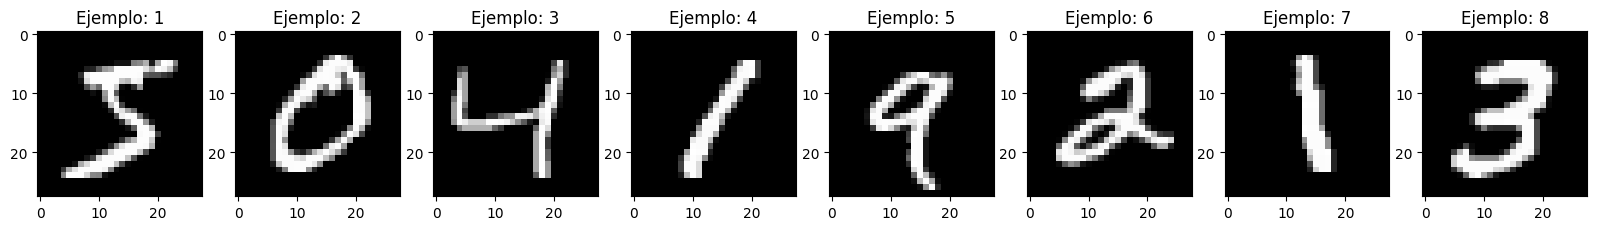

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [ ]:
# Conviertiendo el conjunto de datos en un DataFrame de Pandas
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. División del conjunto de datos

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

In [ ]:
print(len(X_test))
print(len(X_train))

7000
63000


## 4. Entrenamiento del algoritmo

In [ ]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [ ]:
# Número de parámetros que hemos tenido que entrenar
784 * 10 + 10   # pixils (neuronas de entrada) * num. digitos + num. bias

7850

In [ ]:
# Número de parámetros que forman el modelo
clf.coef_.shape

(10, 784)

In [ ]:
# Parámetros bias/intercept
clf.intercept_

array([ -2570.,   -422.,  -2687.,  -3575.,  -1196.,   1266.,  -2836.,
         -231., -10468.,  -2292.])

In [ ]:
# el número de parámetros bias son 10
len(clf.intercept_) # hay un parámetro por cada neurona a entrenar
                    # ya que son 10 las neuronas de la capa de salida

10

Calcularemos la **función de agregación** $z$:
1. $z_1$ para la primera neurona de la capa de salida
2. $z_2$ para la segunda neurona de la capa de salida
3. Y así hasta la décima neurona

$$z_1(x) = x_1 w_{1,1} + x_2 w_{2,1} + x_{784} w_{784,1} + \cdots + b_1$$
$$z_2(x) = x_1 w_{1,2} + x_2 w_{2,2} + x_{784} w_{784,2} + \cdots + b_2$$
$$\vdots$$
$$z_{10}(x) = x_1 w_{1,10} + x_2 w_{2,10} + x_{784} w_{784,10} + \cdots + b_{10}$$

Luego se aplica la **función de activación** que inicialmente fué *heaviside* y que actualmente se usa *sofmax* o *ReLu*.

Así se obtiene el valor estimado que  nos da nuestra red neuronal:

$$h_w(x_1) = \text{heaviside}(z_1)$$
$$h_w(x_2) = \text{heaviside}(z_2)$$
$$\vdots$$
$$h_w(x_{10}) = \text{heaviside}(z_{10})$$

## 5. Predicción con el conjunto de pruebas

In [ ]:
# Realizamos la predicción con el conjunto de datos de prueba
y_pred = clf.predict(X_test)
y_pred  # cada predicción tiene una etiqueta

array(['3', '9', '0', ..., '2', '4', '2'], dtype='<U1')

In [ ]:
print(len(y_test))
len(y_test) == len(y_pred)

7000


True

In [ ]:
# Mostramos el f1_score resultante de la clasificación
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8770853640142969

## 6. Mostrando las imagenes mal clasificadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

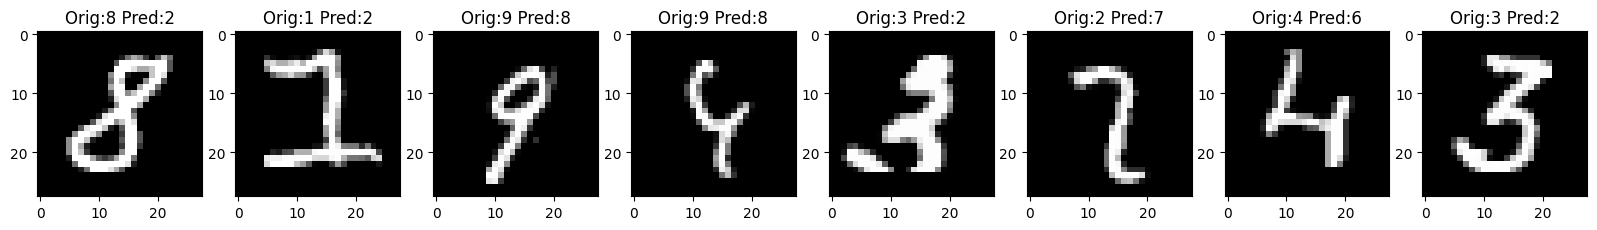

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()